In [1]:
!pip install numpy pandas matplotlib seaborn gym torch stable-baselines3 ns3gym

ERROR: Could not find a version that satisfies the requirement ns3gym (from versions: none)
ERROR: No matching distribution found for ns3gym


In [1]:
!pip install pandas scikit-learn

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
# Load datasets
throughput_df = pd.read_csv("/content/Throughput.csv")
rtt_df = pd.read_csv("/content/RoundTripTimes.csv")
drive_trace_1_df = pd.read_csv("/content/car-driving-trace-1.csv")
drive_trace_2_df = pd.read_csv("/content/car-driving-trace-2.csv")
walking_trace_df = pd.read_csv("/content/walking-trace.csv")

In [4]:
# Check data types of all columns
print(throughput_df.dtypes)

# Check rows that may have non-numeric values
non_numeric_columns = throughput_df.select_dtypes(exclude=['number']).columns
print(throughput_df[non_numeric_columns].head())

protocol            object
carrier             object
num_tcp_conn         int64
server_location     object
run_num              int64
seq_num              int64
throughput_mbps    float64
dtype: object
  protocol carrier server_location
0      TCP  SPRINT         US-East
1      TCP  SPRINT         US-East
2      TCP  SPRINT         US-East
3      TCP  SPRINT         US-East
4      TCP  SPRINT         US-East


In [5]:
# Select only numeric columns and fill NaN values with the mean of each column
numeric_columns = throughput_df.select_dtypes(include=['number']).columns

# Fill NaN values in numeric columns with the mean of each column
throughput_df[numeric_columns] = throughput_df[numeric_columns].fillna(throughput_df[numeric_columns].mean())

In [6]:
import pandas as pd

# Function to convert numeric columns to numeric type and fill missing values with the mean
def process_numeric_columns(df):
    # Convert numeric columns to numeric type
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Fill missing values in numeric columns with the mean of each column
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

    return df

# Process each dataframe
rtt_df = process_numeric_columns(rtt_df)
drive_trace_1_df = process_numeric_columns(drive_trace_1_df)
drive_trace_2_df = process_numeric_columns(drive_trace_2_df)
walking_trace_df = process_numeric_columns(walking_trace_df)

# After this, the numeric columns in each DataFrame should be properly converted and filled with the mean where necessary

In [7]:
# Check the first few rows to verify the changes
print(rtt_df.head())
print(drive_trace_1_df.head())
print(drive_trace_2_df.head())
print(walking_trace_df.head())

   rtt_ms carrier server_location
0    40.0  SPRINT         US-East
1    37.8  SPRINT         US-East
2    39.9  SPRINT         US-East
3    32.8  SPRINT         US-East
4    36.7  SPRINT         US-East
  protocol  num_tcp_conn  seq_num  Sprint_throughput_mbps  \
0      TCP             8        0               25.764822   
1      TCP             8        1               65.068744   
2      TCP             8        2              108.225665   
3      TCP             8        3              122.316545   
4      TCP             8        4              206.656565   

   TMobile_throughput_mbps  Verizon_throughput_mbps  
0               145.754336                53.483537  
1                87.443008                82.326850  
2                88.848384               142.662285  
3               210.428256               188.737785  
4               273.467168               195.172259  
  protocol  num_tcp_conn  seq_num  Sprint_throughput_mbps  \
0      TCP             8        0           

           rtt_ms
count  720.000000
mean    85.648472
std     35.979865
min     24.200000
25%     58.825000
50%     84.600000
75%     99.025000
max    180.000000
       num_tcp_conn     seq_num  Sprint_throughput_mbps  \
count         120.0  120.000000              120.000000   
mean            8.0   60.350000              264.888436   
std             0.0   36.092936              102.570518   
min             8.0    0.000000                9.862157   
25%             8.0   29.750000              201.396046   
50%             8.0   59.500000              262.117138   
75%             8.0   89.250000              326.021795   
max             8.0  125.000000              532.019215   

       TMobile_throughput_mbps  Verizon_throughput_mbps  
count               120.000000               120.000000  
mean                 97.055806               274.892455  
std                  83.858588               477.854963  
min                   0.000000                 0.000000  
25%             

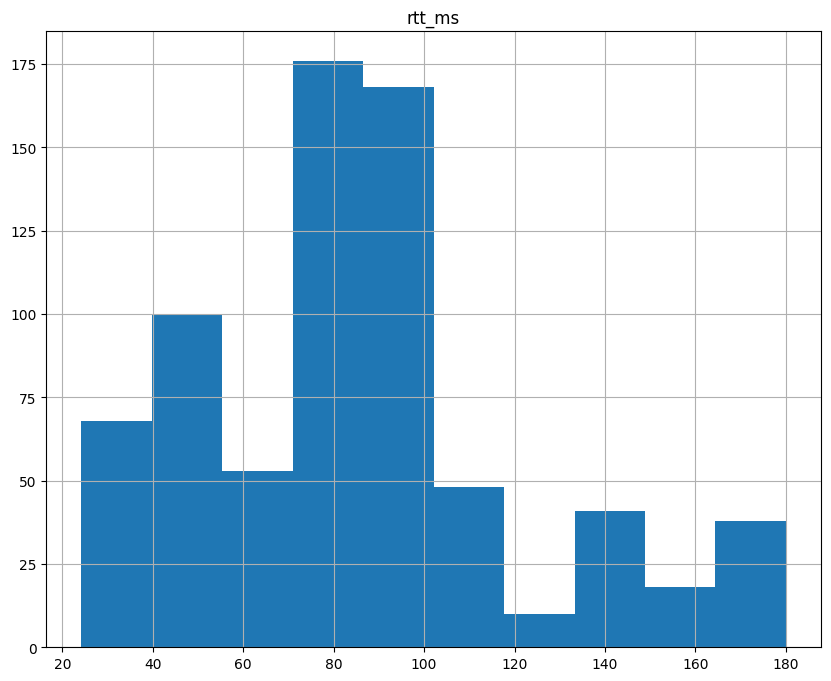

In [8]:
# Summary statistics for the numeric columns
print(rtt_df.describe())
print(drive_trace_1_df.describe())
print(drive_trace_2_df.describe())
print(walking_trace_df.describe())

# Visualizing the data (e.g., histograms)
import matplotlib.pyplot as plt

# Example: plot histograms for numeric columns in rtt_df
rtt_df.hist(figsize=(10, 8))
plt.show()


In [9]:
import pandas as pd

# For rtt_df
numeric_columns_rtt = rtt_df.select_dtypes(include=['number']).columns
rtt_df[numeric_columns_rtt] = rtt_df[numeric_columns_rtt].apply(pd.to_numeric, errors='coerce')
rtt_df[numeric_columns_rtt] = rtt_df[numeric_columns_rtt].fillna(rtt_df[numeric_columns_rtt].mean())

# For drive_trace_1_df
numeric_columns_drive_trace_1 = drive_trace_1_df.select_dtypes(include=['number']).columns
drive_trace_1_df[numeric_columns_drive_trace_1] = drive_trace_1_df[numeric_columns_drive_trace_1].apply(pd.to_numeric, errors='coerce')
drive_trace_1_df[numeric_columns_drive_trace_1] = drive_trace_1_df[numeric_columns_drive_trace_1].fillna(drive_trace_1_df[numeric_columns_drive_trace_1].mean())

# For drive_trace_2_df
numeric_columns_drive_trace_2 = drive_trace_2_df.select_dtypes(include=['number']).columns
drive_trace_2_df[numeric_columns_drive_trace_2] = drive_trace_2_df[numeric_columns_drive_trace_2].apply(pd.to_numeric, errors='coerce')
drive_trace_2_df[numeric_columns_drive_trace_2] = drive_trace_2_df[numeric_columns_drive_trace_2].fillna(drive_trace_2_df[numeric_columns_drive_trace_2].mean())

# For walking_trace_df
numeric_columns_walking_trace = walking_trace_df.select_dtypes(include=['number']).columns
walking_trace_df[numeric_columns_walking_trace] = walking_trace_df[numeric_columns_walking_trace].apply(pd.to_numeric, errors='coerce')
walking_trace_df[numeric_columns_walking_trace] = walking_trace_df[numeric_columns_walking_trace].fillna(walking_trace_df[numeric_columns_walking_trace].mean())

# After this, the numeric columns in each DataFrame should be properly converted and filled with the mean where necessary


In [10]:
label_enc = LabelEncoder()

# Encoding 'protocol' and 'carrier' columns if present
for df in [throughput_df, rtt_df, drive_trace_1_df, drive_trace_2_df, walking_trace_df]:
    if 'protocol' in df.columns:
        df['protocol'] = label_enc.fit_transform(df['protocol'])
    if 'carrier' in df.columns:
        df['carrier'] = label_enc.fit_transform(df['carrier'])
    if 'server_location' in df.columns:
        df['server_location'] = label_enc.fit_transform(df['server_location'])
    if 'radio_type' in df.columns:
        df['radio_type'] = label_enc.fit_transform(df['radio_type'])
    if 'nrStatus' in df.columns:
        df['nrStatus'] = label_enc.fit_transform(df['nrStatus'])
    if 'primitive_handoff_type' in df.columns:
        df['primitive_handoff_type'] = label_enc.fit_transform(df['primitive_handoff_type'])

In [11]:
# Normalize throughput and RTT values
scaler = MinMaxScaler()

# Apply normalization to relevant columns
throughput_df['throughput_mbps'] = scaler.fit_transform(throughput_df[['throughput_mbps']])
rtt_df['rtt_ms'] = scaler.fit_transform(rtt_df[['rtt_ms']])
drive_trace_1_df[['Sprint_throughput_mbps', 'TMobile_throughput_mbps', 'Verizon_throughput_mbps']] = scaler.fit_transform(drive_trace_1_df[['Sprint_throughput_mbps', 'TMobile_throughput_mbps', 'Verizon_throughput_mbps']])
drive_trace_2_df[['Sprint_throughput_mbps', 'TMobile_throughput_mbps', 'Verizon_throughput_mbps']] = scaler.fit_transform(drive_trace_2_df[['Sprint_throughput_mbps', 'TMobile_throughput_mbps', 'Verizon_throughput_mbps']])
walking_trace_df['throughput_mbps'] = scaler.fit_transform(walking_trace_df[['throughput_mbps']])

In [12]:
# Save preprocessed datasets
throughput_df.to_csv("Preprocessed_Throughput_Data.csv", index=False)
rtt_df.to_csv("Preprocessed_Round_Trip_Times_data.csv", index=False)
drive_trace_1_df.to_csv("Preprocessed_Car_Driving_Trace-1.csv", index=False)
drive_trace_2_df.to_csv("Preprocessed_Car_Driving_Trace-2.csv", index=False)
walking_trace_df.to_csv("Preprocessed_Walking_trace.csv", index=False)

print("Preprocessing complete. Files saved.")

Preprocessing complete. Files saved.


In [13]:
import numpy as np

# Create time-based features (assuming you have a 'timestamp' column)
for df in [throughput_df, rtt_df, drive_trace_1_df, drive_trace_2_df, walking_trace_df]:
    if 'timestamp' in df.columns:
        df['hour'] = df['timestamp'].dt.hour
        df['day_of_week'] = df['timestamp'].dt.dayofweek
        df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Adding network congestion indicators
# Assuming you have throughput and RTT data, these can be indicative of network congestion
throughput_df['high_throughput'] = np.where(throughput_df['throughput_mbps'] > throughput_df['throughput_mbps'].quantile(0.75), 1, 0)
rtt_df['high_rtt'] = np.where(rtt_df['rtt_ms'] > rtt_df['rtt_ms'].quantile(0.75), 1, 0)

# Create a combined feature indicating high congestion or optimal performance
df_combined = throughput_df[['high_throughput']].merge(rtt_df[['high_rtt']], left_index=True, right_index=True, how='inner')
df_combined['network_congestion'] = np.where((df_combined['high_throughput'] == 1) | (df_combined['high_rtt'] == 1), 1, 0)

In [14]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load datasets
throughput_df = pd.read_csv("/content/Preprocessed_Throughput_Data.csv")
rtt_df = pd.read_csv("/content/Preprocessed_Round_Trip_Times_data.csv")
drive_trace_1_df = pd.read_csv("/content/Preprocessed_Car_Driving_Trace-1.csv")
drive_trace_2_df = pd.read_csv("/content/Preprocessed_Car_Driving_Trace-2.csv")
walking_trace_df = pd.read_csv("/content/Preprocessed_Walking_trace.csv")

# Feature engineering (time-based trends and congestion indicators)
for df in [throughput_df, rtt_df, drive_trace_1_df, drive_trace_2_df, walking_trace_df]:
    if 'timestamp' in df.columns:
        df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
        df['day_of_week'] = pd.to_datetime(df['timestamp']).dt.dayofweek
        df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Adding network congestion indicators
throughput_df['high_throughput'] = np.where(throughput_df['throughput_mbps'] > throughput_df['throughput_mbps'].quantile(0.75), 1, 0)
rtt_df['high_rtt'] = np.where(rtt_df['rtt_ms'] > rtt_df['rtt_ms'].quantile(0.75), 1, 0)

# Create a combined feature indicating high congestion or optimal performance
df_combined = throughput_df[['high_throughput']].merge(rtt_df[['high_rtt']], left_index=True, right_index=True, how='inner')
df_combined['network_congestion'] = np.where((df_combined['high_throughput'] == 1) | (df_combined['high_rtt'] == 1), 1, 0)

In [16]:
!pip install stable-baselines3
!pip install gym

In [17]:
!pip install shimmy>=2.0

In [18]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gym import Env, spaces
import numpy as np

# Custom environment for network optimization (a simple placeholder)
class NetworkOptimizationEnv(Env):
    def __init__(self, throughput, rtt, actions=2):
        super(NetworkOptimizationEnv, self).__init__()
        self.throughput = throughput
        self.rtt = rtt
        self.actions = actions
        self.state = None
        self.action_space = spaces.Discrete(actions)
        self.observation_space = spaces.Box(low=0, high=1, shape=(len(self.throughput.columns),), dtype=np.float32)

    def reset(self):
        self.state = self.throughput.sample(n=1).values[0]  # Placeholder for resetting state
        return self.state

    def step(self, action):
        # Action will control network optimization; for now, placeholder action logic
        if action == 0:  # Assume action 0 is "improve throughput"
            reward = np.mean(self.throughput) - np.mean(self.rtt)  # Simple placeholder reward
        else:  # Action 1: Improve RTT
            reward = np.mean(self.rtt) - np.mean(self.throughput)

        done = False
        info = {}
        return self.state, reward, done, info

# Instantiate and wrap environment
env = DummyVecEnv([lambda: NetworkOptimizationEnv(throughput_df, rtt_df)])

# Initialize PPO agent
model = PPO("MlpPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=100000)

# Save the model
model.save("/content/ppo_network_optimization")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cuda device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 395  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 373         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.023446094 |
|    clip_fraction        | 0.599       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.672      |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 585         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0599     |
|    value_loss           | 1.21e+03    |
-----------------------------------------
----------------------------------

In [19]:
# Load the trained model
model = PPO.load("/content/ppo_network_optimization")

# Test the model for a few steps in the environment
obs = env.reset()  # Initial state
for _ in range(100):  # Test for 100 steps
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    print(f"Action taken: {action}, Reward: {reward}")

Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward

In [20]:
# Load the trained PPO model
model = PPO.load("/content/ppo_network_optimization")

# Test the model for a few steps in the environment
obs = env.reset()  # Initial state
optimized_throughput = []  # List to store optimized throughput values

for _ in range(100):  # Test for 100 steps
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)

    # Store optimized throughput (or any other metric you want to track)
    optimized_throughput.append(np.mean(obs))  # Example: mean of observation (throughput)

    print(f"Action taken: {action}, Reward: {reward}")

# Convert optimized throughput to a numpy array for further processing
optimized_throughput = np.array(optimized_throughput)

Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward: [11.565506]
Action taken: [0], Reward

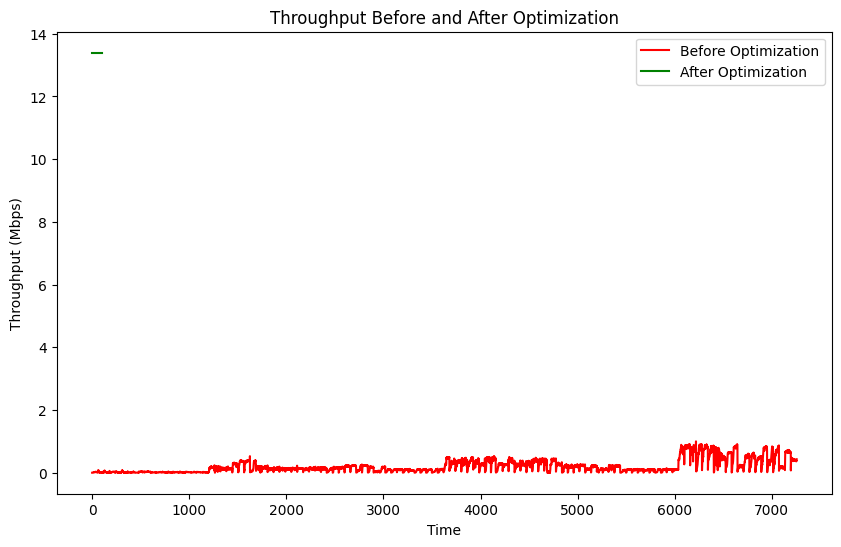

In [21]:
import matplotlib.pyplot as plt

# Assuming `throughput_df` contains the original throughput data
plt.figure(figsize=(10, 6))

# Plot the throughput before optimization
plt.plot(throughput_df['throughput_mbps'], label='Before Optimization', color='red')

# Plot the throughput after optimization (using optimized throughput from model)
plt.plot(optimized_throughput, label='After Optimization', color='green')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput Before and After Optimization')
plt.legend()

# Show the plot
plt.show()

In [23]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.4 MB/s eta 0:00:00


In [24]:
import optuna
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from gym import Env, spaces
import numpy as np

# Create an objective function for Optuna hyperparameter optimization
def optimize_hyperparameters(trial):
    # Sample hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    batch_size = trial.suggest_int('batch_size', 16, 256)
    gamma = trial.suggest_uniform('gamma', 0.9, 0.99)

    # Create environment
    env = DummyVecEnv([lambda: NetworkOptimizationEnv(throughput_df, rtt_df)])

    # Initialize PPO agent with sampled hyperparameters
    model = PPO("MlpPolicy", env, learning_rate=learning_rate, batch_size=batch_size, gamma=gamma, verbose=0)

    # Train the model
    model.learn(total_timesteps=100000)

    # Return the reward achieved by the model (can be mean of rewards over testing episodes)
    mean_reward = evaluate_model(model)
    return mean_reward

# Function to evaluate the model
def evaluate_model(model):
    obs = env.reset()
    total_reward = 0
    for _ in range(100):  # Test for 100 steps
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        total_reward += reward
    return total_reward / 100  # Average reward over 100 steps

# Create an Optuna study to optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(optimize_hyperparameters, n_trials=10)

# Print the best hyperparameters found by Optuna
print("Best hyperparameters:", study.best_params)


[I 2025-03-03 04:43:49,303] A new study created in memory with name: no-name-81a0ddeb-a2e5-4916-972e-90e307ba9ab1
<ipython-input-24-a72c3859c9ee>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-24-a72c3859c9ee>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  gamma = trial.suggest_uniform('gamma', 0.9, 0.99)
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, whic

Best hyperparameters: {'learning_rate': 7.587198431096442e-05, 'batch_size': 144, 'gamma': 0.9244740330619202}


In [33]:
!pip install pyngrok
!pip install stable-baselines3

In [28]:
!ngrok authtoken 2tnEBq2xMj3Vx7EPDQUc3V9caYa_57CasV4NMvZRQim2XRHEU


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [34]:
from flask import Flask, request, jsonify
import numpy as np
from stable_baselines3 import PPO
import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from pyngrok import ngrok
import threading


In [35]:
# Set up a tunnel to the Flask app
public_url = ngrok.connect(5000)
print(f"Flask app is accessible at {public_url}")


Flask app is accessible at NgrokTunnel: "https://b76d-35-198-218-178.ngrok-free.app" -> "http://localhost:5000"


In [36]:
# Load the PPO model
model = PPO.load("/content/ppo_network_optimization")

# Create Flask app
app = Flask(__name__)

# Define a function for network optimization prediction
@app.route('/optimize', methods=['POST'])
def optimize_network():
    # Receive data from the user (this should be a JSON with throughput and RTT values)
    data = request.get_json()

    # Assuming the data contains 'throughput' and 'rtt' as lists
    throughput = np.array(data['throughput'])
    rtt = np.array(data['rtt'])

    # Create a dummy environment with received data
    env = DummyVecEnv([lambda: NetworkOptimizationEnv(throughput, rtt)])

    # Predict the action using the trained model
    obs = env.reset()
    action, _states = model.predict(obs)

    # Return the optimized action
    return jsonify({"action": int(action)})

# Function to run the Flask app in a separate thread
def run_flask():
    app.run(host='0.0.0.0', port=5000)

# Run Flask app in a separate thread
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()

 * Serving Flask app '__main__'
